<a href="https://colab.research.google.com/github/SHARJEEL-MUSHTAQ/Data-scrapping-/blob/main/KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

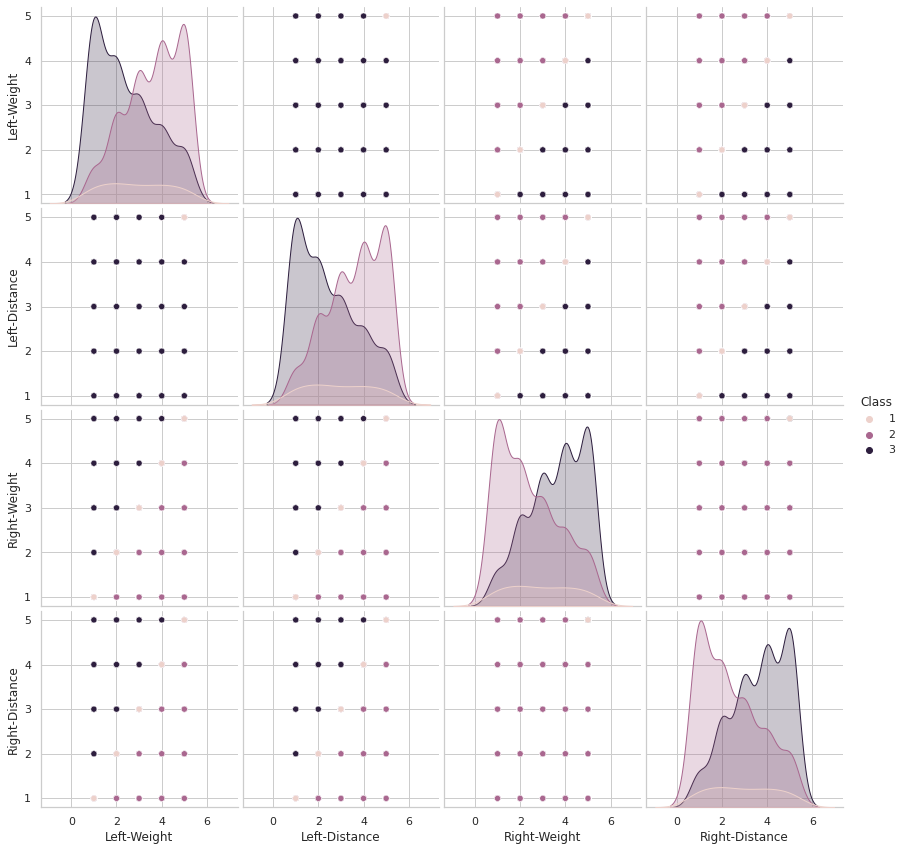

     Left-Weight  Left-Distance  Right-Weight  Right-Distance
0              1              1             1               1
1              1              1             1               2
2              1              1             1               3
3              1              1             1               4
4              1              1             1               5
..           ...            ...           ...             ...
620            5              5             5               1
621            5              5             5               2
622            5              5             5               3
623            5              5             5               4
624            5              5             5               5

[625 rows x 4 columns]
0      1
1      3
2      3
3      3
4      3
      ..
620    2
621    2
622    2
623    2
624    1
Name: Class, Length: 625, dtype: int64
     Left-Weight  Left-Distance  Right-Weight  Right-Distance
0            0.0            0.0 

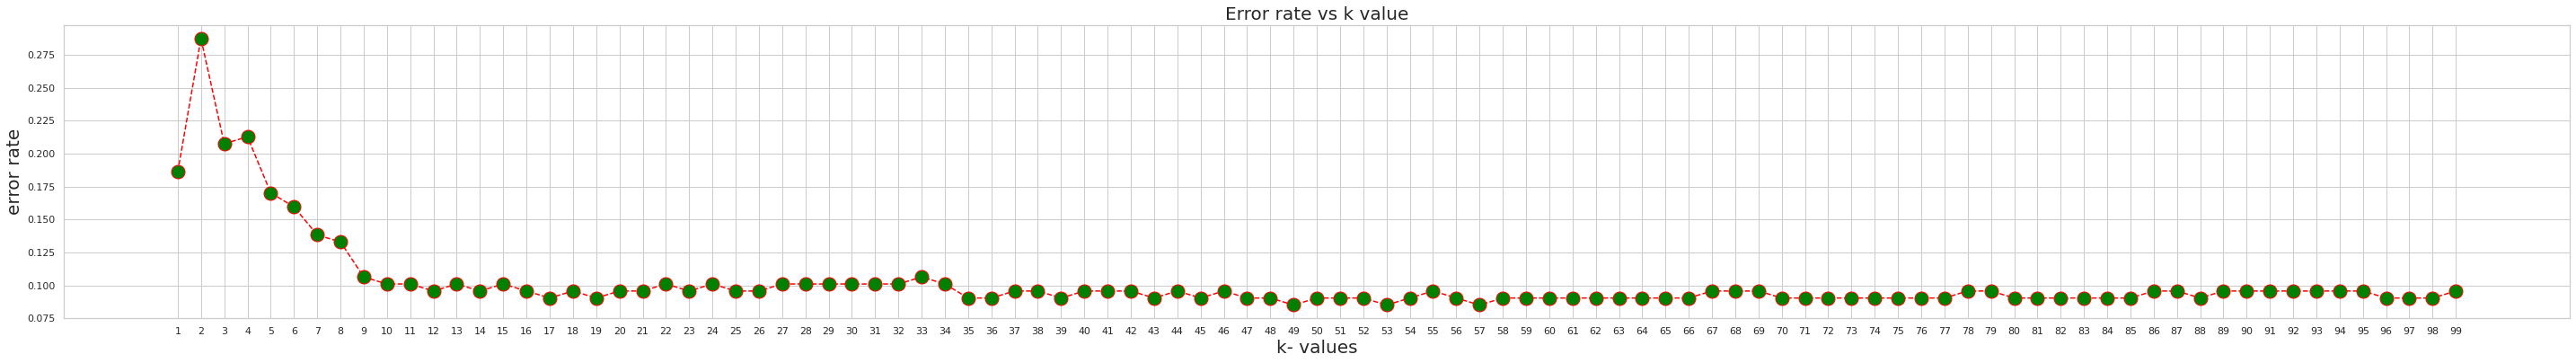

The accuracy of the knn classifier is 0.90 out of 1 on training data
The accuracy of the knn classifier is 0.91 out of 1 on test data
Confusion Matrix:
[[ 0 12  3]
 [ 0 82  1]
 [ 0  1 89]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.86      0.99      0.92        83
           3       0.96      0.99      0.97        90

    accuracy                           0.91       188
   macro avg       0.61      0.66      0.63       188
weighted avg       0.84      0.91      0.87       188

Accuracy: 0.9095744680851063


In [ ]:
### Librarires
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Import Data
df = pd.read_csv('/content/balance.csv')
df.head()

### Initiallization of Class
df['Class'].unique()

### Check For Null Values
df.isnull().values.any()

### Mapping Numbers
df['Class'] = df['Class'].map({'B' :1, 'L' :2, 'R' :3}).astype(int)
df.head()

### EDA exploratory data analysis (IMPORTANT TO SEE WHAT WE ARE USING AND VISIUALLIZE IT)
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Class", height=3);
plt.show()

### Normallization
x_data = df.drop(['Class'],axis=1)
y_data = df['Class']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])
df.head()
print(x_data) ### Not Normallized because its acts like a dataframe
print(y_data) ### Not Normallized because its a class
print(data) ### Normallized Data of x_data

### Train
X_train, X_test, y_train, y_test = train_test_split(data, y_data , test_size=0.3, random_state = 3)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

### Find Oprimal Value of K
error_rate=[]#list that will store the average error rate value of k
for i in range (1,100):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

#plotting the error rate vs k graph
plt.figure(figsize=(50,6))
plt.plot(range(1,100),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,100))
plt.show()

### KNN after optimal Value of K
knn = KNeighborsClassifier(n_neighbors=59, p=2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))
ypred=knn.predict(X_test) #These are the predicted output values

###  Visuallize Results
confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)